In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [3]:
# URL of the Wikipedia page to scrape
url = "https://en.wikipedia.org/wiki/List_of_countries_and_dependencies_by_population"

# Send a GET request to the URL
response = requests.get(url)

In [4]:
# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Parse the HTML content of the page
    soup = BeautifulSoup(response.content, 'html.parser')

    # Find the table containing the country data
    table = soup.find('table', class_='wikitable')

    # Check if the table was found
    if table:
        # Extract data from the table
        rows = []
        for row in table.find_all('tr')[1:]:  # Skip the header row
            # Extract data from each column in the row
            columns = row.find_all('td')
            if len(columns) >= 2:  # Ensure there are at least two columns
                country = columns[1].text.strip()  # Country name
                population = columns[2].text.strip()  # Population
                rows.append([country, population])

        # Display/print the first 10 rows as a table
        df = pd.DataFrame(rows, columns=['Country', 'Population'])
        print("First 20 rows of the table:")
        display(df.head(20))
        
        # Save the data to a CSV file
        df.to_csv('CSC221-webscrape-data.csv', index=False)
        print("\nData has been saved to CSC221-webscrape-data.csv successfully.")
    else:
        print("Table not found on the page.")
else:
    print("Failed to retrieve the webpage.")

First 20 rows of the table:


,Country,Population
0,World,"8,103,920,000"
1,China,"1,409,670,000"
2,"1,400,744,000",17.3%
3,United States,"335,893,238"
4,Indonesia,"279,118,866"
5,Pakistan,"241,499,431"
6,Nigeria,"223,800,000"
7,Brazil,"203,080,756"
8,Bangladesh,"169,828,911"
9,Russia,"146,150,789"



Data has been saved to CSC221-webscrape-data.csv successfully.


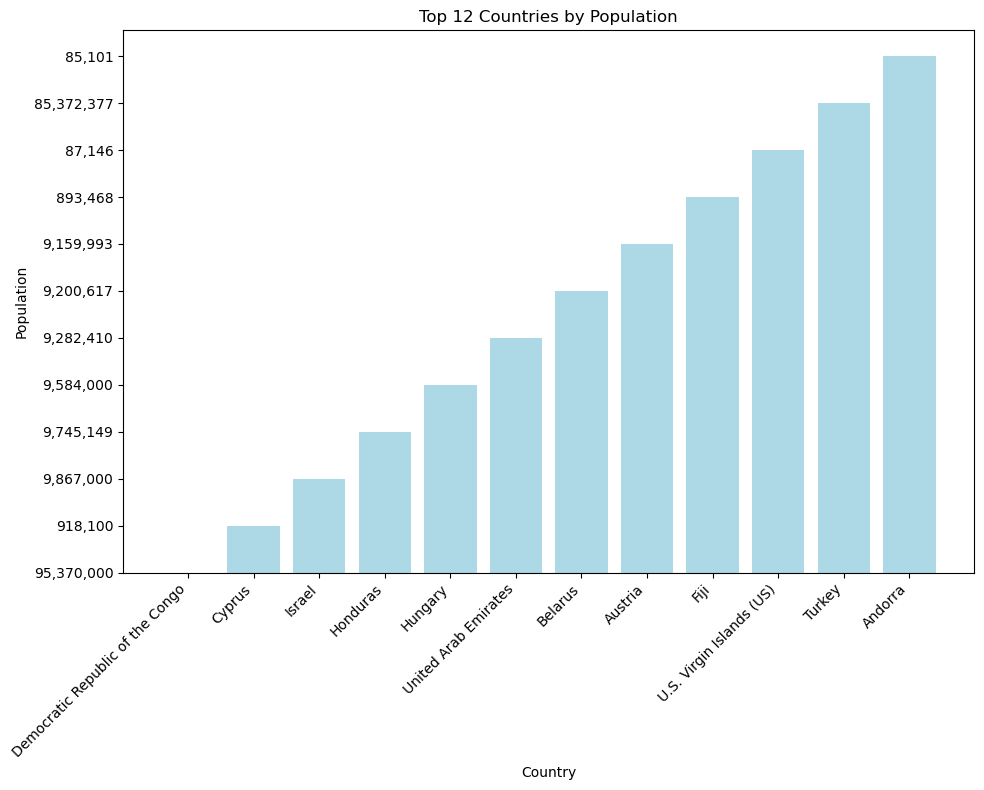

In [59]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the CSV file
df = pd.read_csv('CSC221-webscrape-data.csv')

# Sort the DataFrame by population in descending order
df_sorted = df.sort_values(by='Population', ascending=False)
# Select the top N countries by population and display 12 countries
N = 12
top_countries = df_sorted.head(N)
# Create a bar plot and set the size of the plot
plt.figure(figsize=(10, 8))
# Create the bar plot
plt.bar(top_countries['Country'], top_countries['Population'], color='lightblue')
# Add title to the plot
plt.title('Top 12 Countries by Population')
# Add labels to the axes
plt.xlabel('Country')
plt.ylabel('Population')
# Rotate x-axis labels by 45 degrees for better clarity.
plt.xticks(rotation=45, ha='right')
# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()